In statistics, an **outlier** is an observation point that is distant from other observations.

In [2]:
# Load library
import pandas as pd

We will check for Outliers on a randomly created dataset and on a Dataframe and on a Dataset.

# **1.DataFrame**

Create a Dataframe

In [5]:
# Create DataFrame
cars = pd.DataFrame()
cars['Price'] = [340_000, 390_000, 350_000, 430_000]
cars['tire_radius'] = [2, 3.5, 2, 116]
cars['House_power'] = [1500, 2500, 1800, 48_000]

cars

,Price,tire_radius,House_power
0,340000,2.0,1500
1,390000,3.5,2500
2,350000,2.0,1800
3,430000,116.0,48000


1. You can use a value to drop outliers.

In [6]:
# Drop observations greater than some value
cars[cars['House_power'] < 10_000]

,Price,tire_radius,House_power
0,340000,2.0,1500
1,390000,3.5,2500
2,350000,2.0,1800


2.If one wants to mark the outliers, its also possible

In [8]:

# Load library
import numpy as np

# Create feature based on boolean condition eg when the Horse Power is greater than 10,000
cars['Outlier'] = np.where(cars['House_power'] < 10_000, 0, 1)

# Show data
cars

,Price,tire_radius,House_power,Outlier
0,340000,2.0,1500,0
1,390000,3.5,2500,0
2,350000,2.0,1800,0
3,430000,116.0,48000,1


3. Rescaling

In [9]:
# Log feature
cars['Log_Of_Square_Feet'] = [np.log(x) for x in cars['House_power']]

# Show data
cars

,Price,tire_radius,House_power,Outlier,Log_Of_Square_Feet
0,340000,2.0,1500,0,7.313220
1,390000,3.5,2500,0,7.824046
2,350000,2.0,1800,0,7.495542
3,430000,116.0,48000,1,10.778956


4. Using EllipticEnvelope

**EllipticEnvelope** is a function that tries to figure out the key parameters of your data's general distribution by assuming that your entire data is an expression of an underlying multivariate Gaussian distribution. That's an assumption that cannot hold true for all datasets, yet when it does, it proves an effective method indeed for spotting outliers. Simplifying the complex estimations working behind the algorithm as much as possible, we can say that it checks the distance of each observation with respect to a grand mean that takes into account all the variables in your dataset. For this reason, it is able to spot both univariate and multivariate outliers.

In [10]:
# Load libraries
import numpy as np
from sklearn.covariance import EllipticEnvelope
from sklearn.datasets import make_blobs

**Create Data**

In [12]:
# Create simulated data
X, _ = make_blobs(n_samples = 10,
                  n_features = 3,
                  centers = 1,
                  random_state = 1)

In [13]:
# Replace the first observation's values with extreme values
X[0,0] = 10000
X[0,1] = 10000

**Detect Outliers**

EllipticEnvelope assumes the data is normally distributed and based on that assumption “draws” an ellipse around the data, classifying any observation inside the ellipse as an inlier (labeled as 1) and any observation outside the ellipse as an outlier (labeled as -1). A major limitation of this approach is the need to specify a contamination parameter which is the proportion of observations that are outliers, a value that we don’t know.

In [17]:
# Create detector
outlier_detector = EllipticEnvelope(contamination=.1)

# Fit detector
outlier_detector.fit(X)

# Predict outliers
outlier_detector.predict(X)

array([-1,  1,  1,  1,  1,  1,  1,  1,  1,  1])

#**2. Dataset**

We will be using Boston House Pricing Dataset which is included in the sklearn dataset API

## a. Load Dataset

In [20]:
#Loading the Dataset
from sklearn.datasets import load_boston
import pandas as pd

boston = load_boston()
x = boston.data
y = boston.target
columns = boston.feature_names

In [21]:
#create the dataframe
boston_df = pd.DataFrame(boston.data)
boston_df.columns = columns
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


**Features/independent variable will be used to look for any outliers**

### **1. Boxplots**



---



In descriptive statistics, a box plot is a method for graphically depicting groups of numerical data through their quartiles. Box plots may also have lines extending vertically from the boxes (whiskers) indicating variability outside the upper and lower quartiles, hence the terms box-and-whisker plot and box-and-whisker diagram. Outliers may be plotted as individual points


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


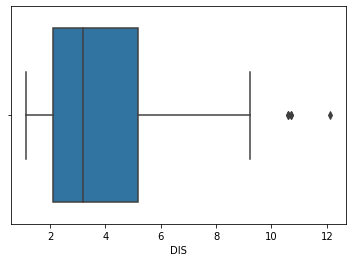

In [22]:
import seaborn as sns
sns.boxplot(x=boston_df['DIS'])

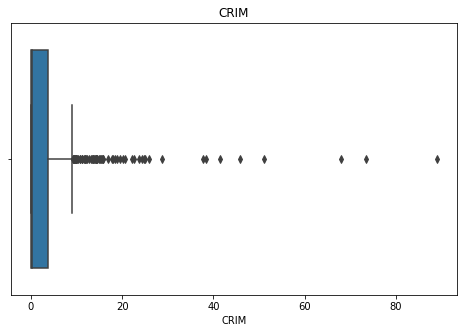

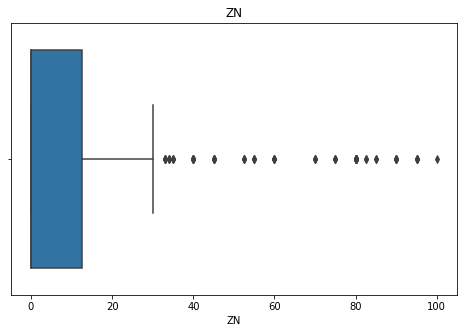

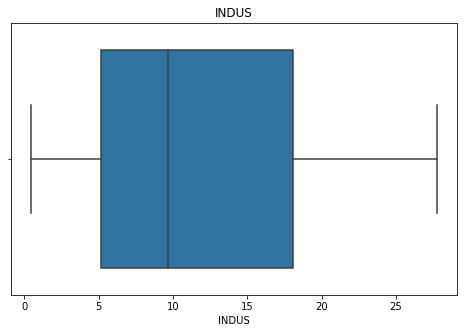

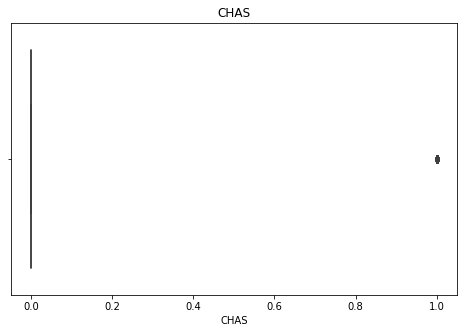

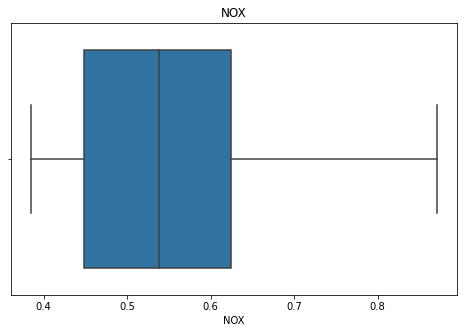

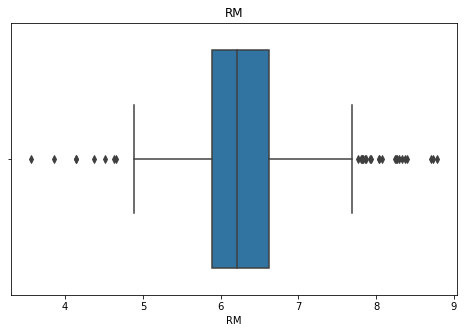

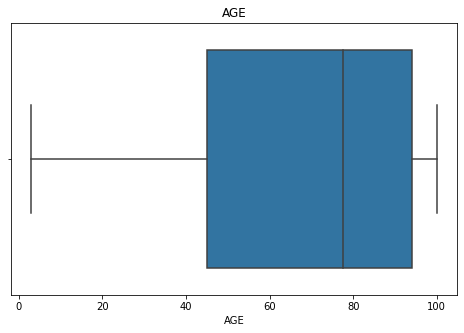

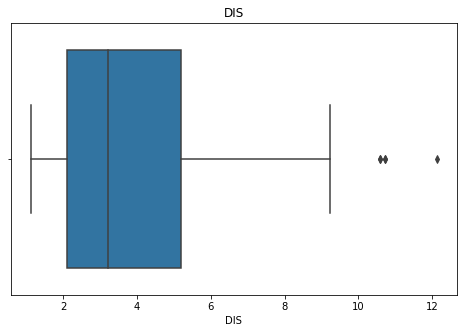

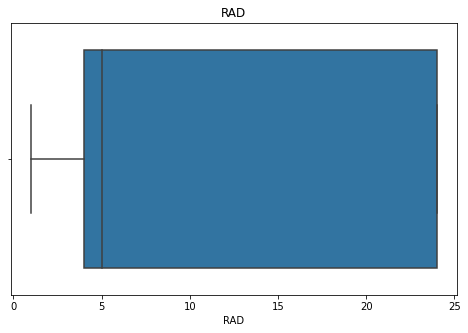

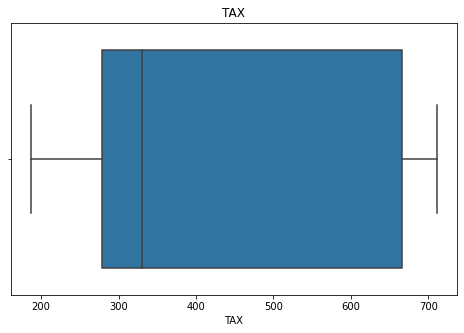

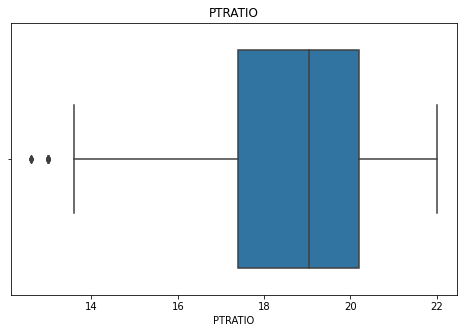

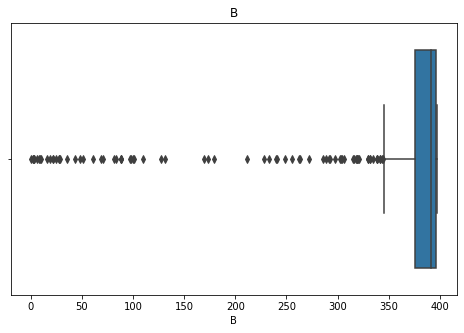

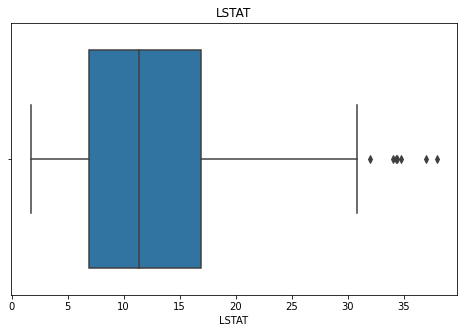

In [25]:
#We can also use a function to check the outliers
import matplotlib.pyplot as plt

# Cheking for outliers

integers =['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT']
for i, j in enumerate(integers):
  plt.figure(figsize=(8,5))
  plt.title(j)
  sns.boxplot(boston_df[j])

### **2.Scatter plot**



---


A scatter plot , is a type of plot or mathematical diagram using Cartesian coordinates to display values for typically two variables for a set of data. The data are displayed as a collection of points, each having the value of one variable determining the position on the horizontal axis and the value of the other variable determining the position on the vertical axis.

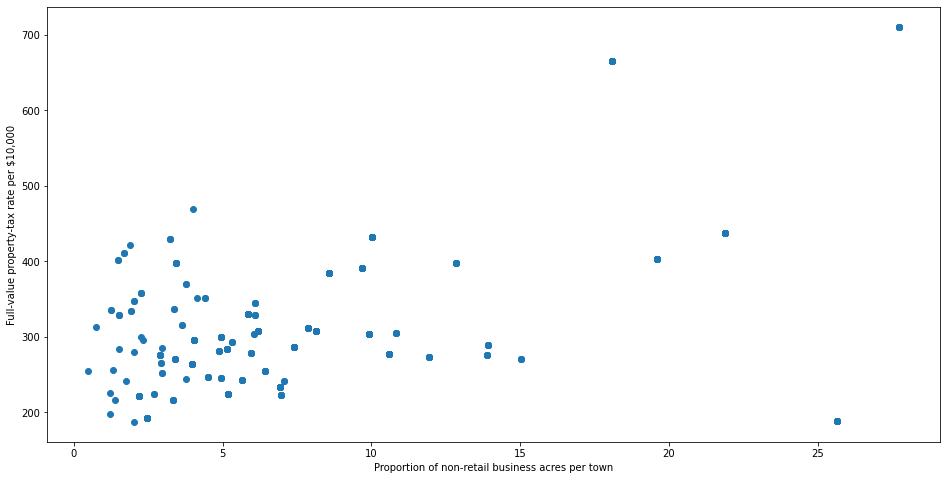

In [26]:
fig, ax = plt.subplots(figsize=(16,8))
ax.scatter(boston_df['INDUS'], boston_df['TAX'])
ax.set_xlabel('Proportion of non-retail business acres per town')
ax.set_ylabel('Full-value property-tax rate per $10,000')
plt.show()

### **3.Discover outliers with mathematical function**

***a.Z-Score***

The Z-score is the signed number of standard deviations by which the value of an observation or data point is above the mean value of what is being observed or measured.

The intuition behind Z-score is to describe any data point by finding their relationship with the Standard Deviation and Mean of the group of data points.

 Z-score is finding the distribution of data where mean is 0 and standard deviation is 1 i.e. normal distribution.


You must be wondering that, how does this help in identifying the outliers? 

Well, while calculating the Z-score we re-scale and center the data and look for data points which are too far from zero. 

These data points which are way too far from zero will be treated as the outliers. 

In most of the cases a threshold of 3 or -3 is used i.e if the Z-score value is greater than or less than 3 or -3 respectively, that data point will be identified as outliers.

In [27]:
from scipy import stats
import numpy as np
z = np.abs(stats.zscore(boston_df))
print(z)

[[0.41978194 0.28482986 1.2879095  ... 1.45900038 0.44105193 1.0755623 ]
 [0.41733926 0.48772236 0.59338101 ... 0.30309415 0.44105193 0.49243937]
 [0.41734159 0.48772236 0.59338101 ... 0.30309415 0.39642699 1.2087274 ]
 ...
 [0.41344658 0.48772236 0.11573841 ... 1.17646583 0.44105193 0.98304761]
 [0.40776407 0.48772236 0.11573841 ... 1.17646583 0.4032249  0.86530163]
 [0.41500016 0.48772236 0.11573841 ... 1.17646583 0.44105193 0.66905833]]


This array is not understandable . However we can define a thteshold to identify an OUTLIER


In [28]:
threshold = 3
print(np.where(z > 3))

(array([ 55,  56,  57, 102, 141, 142, 152, 154, 155, 160, 162, 163, 199,
       200, 201, 202, 203, 204, 208, 209, 210, 211, 212, 216, 218, 219,
       220, 221, 222, 225, 234, 236, 256, 257, 262, 269, 273, 274, 276,
       277, 282, 283, 283, 284, 347, 351, 352, 353, 353, 354, 355, 356,
       357, 358, 363, 364, 364, 365, 367, 369, 370, 372, 373, 374, 374,
       380, 398, 404, 405, 406, 410, 410, 411, 412, 412, 414, 414, 415,
       416, 418, 418, 419, 423, 424, 425, 426, 427, 427, 429, 431, 436,
       437, 438, 445, 450, 454, 455, 456, 457, 466]), array([ 1,  1,  1, 11, 12,  3,  3,  3,  3,  3,  3,  3,  1,  1,  1,  1,  1,
        1,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  5,  3,  3,  1,  5,
        5,  3,  3,  3,  3,  3,  3,  1,  3,  1,  1,  7,  7,  1,  7,  7,  7,
        3,  3,  3,  3,  3,  5,  5,  5,  3,  3,  3, 12,  5, 12,  0,  0,  0,
        0,  5,  0, 11, 11, 11, 12,  0, 12, 11, 11,  0, 11, 11, 11, 11, 11,
       11,  0, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11]

Don’t be confused by the results. The first array contains the list of row numbers and second array respective column numbers, which mean z[55][1] have a Z-score higher than 3.

In [29]:
print(z[55][1])

3.375038763517309


So, the data point — 55th record on column ZN is an outlier.

### ***4.IQR score*** 

Box plot use the IQR method to display data and outliers(shape of the data) but in order to be get a list of identified outlier, we will need to use the mathematical formula and retrieve the outlier data.


The interquartile range (IQR), also called the midspread or middle 50%, or technically H-spread, is a measure of statistical dispersion, being equal to the difference between 75th and 25th percentiles, or between upper and lower quartiles, IQR = Q3 − Q1.



---

It is a measure of the dispersion similar to standard deviation or variance, but is much more robust against outliers.

In [31]:
Q1 = boston_df.quantile(0.25)
Q3 = boston_df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

CRIM         3.595038
ZN          12.500000
INDUS       12.910000
CHAS         0.000000
NOX          0.175000
RM           0.738000
AGE         49.050000
DIS          3.088250
RAD         20.000000
TAX        387.000000
PTRATIO      2.800000
B           20.847500
LSTAT       10.005000
dtype: float64


In [32]:
print(boston_df < (Q1 - 1.5 * IQR)) |(boston_df > (Q3 + 1.5 * IQR))

      CRIM     ZN  INDUS   CHAS    NOX  ...    RAD    TAX  PTRATIO      B  LSTAT
0    False  False  False  False  False  ...  False  False    False  False  False
1    False  False  False  False  False  ...  False  False    False  False  False
2    False  False  False  False  False  ...  False  False    False  False  False
3    False  False  False  False  False  ...  False  False    False  False  False
4    False  False  False  False  False  ...  False  False    False  False  False
..     ...    ...    ...    ...    ...  ...    ...    ...      ...    ...    ...
501  False  False  False  False  False  ...  False  False    False  False  False
502  False  False  False  False  False  ...  False  False    False  False  False
503  False  False  False  False  False  ...  False  False    False  False  False
504  False  False  False  False  False  ...  False  False    False  False  False
505  False  False  False  False  False  ...  False  False    False  False  False

[506 rows x 13 columns]


TypeError: ignored

Removing the outliers using Z-score

In [35]:
boston_df_o = boston_df[(z < 3).all(axis=1)]

In [37]:
boston_df.shape

(506, 13)

In [39]:
boston_df_o.shape

(415, 13)

Using IQR to loose the Outliers

In [40]:
boston_df_out = boston_df[~((boston_df < (Q1 - 1.5 * IQR)) |(boston_df > (Q3 + 1.5 * IQR))).any(axis=1)]
boston_df_out.shape

(274, 13)

# **Summary**

IQR losses a lot of Data by inspecting the different shapes.

Z-score is more efficient.